In [4]:

using Pkg
Pkg.activate("../GREAC")  # Activate the project environment
Pkg.instantiate()  # Ensure dependencies are installed

# Load GREAC and its dependencies properly
using GREAC
using FASTX, LinearAlgebra, Plots, DSP, AbstractFFTs, Statistics

# If you need internal modules explicitly:
using GREAC.DataIO, GREAC.ClassificationModel, GREAC.RegionExtraction
using Plots.PlotMeasures


  Activating project at `~/Desktop/GREAC/GREAC`


In [ ]:

function havein(pos, regions)
    for (i,e ) in regions
        if pos >=i && pos <=e
            return pos,i,e
        end
    end
    return pos,0,0
end
function intersecao_intervalos(r1::Tuple{Int, Int}, r2::Tuple{Int, Int})
    inicio1, fim1 = r1
    inicio2, fim2 = r2

    if inicio1 > fim1 || inicio2 > fim2
        error("Os intervalos devem ser do tipo (início <= fim)")
    end

    inicio_intersecao = max(inicio1, inicio2)
    fim_intersecao = min(fim1, fim2)

    if inicio_intersecao <= fim_intersecao
        return (inicio_intersecao, fim_intersecao)
    else
        return nothing 
    end
end



intersecao_intervalos (generic function with 1 method)

In [4]:
pos = [2790,
    3037,
    5386,
    5648,
    8393,
    10029,
    12880,
    13195,
    14408,
    15714,
    17410,
    23403,
    23525,
    24424,
    24469,
    25088,
    26060,
    26149,
    28512]

for w in ["0.002","0.004","0.006","0.008"]
    modelCachedFile::String = "$(homedir())/.project_cache/$groupName/$w/kmers_distribution.dat"
    model = DataIO.load_cache(modelCachedFile)
    havepos = Base.Fix2(havein, model.regions)
    

    found = map(havepos, pos)
    count = 0

    for (pos, i, e) in found
    if i != 0
        count +=1 
    end
    end
    @show w count
end
# modelCachedFile::String = "$(homedir())/.project_cache/$groupName/0.004/kmers_distribution.dat"
# modelCachedFile::String = "$(homedir())/.project_cache/$groupName/0.004/Alpha_outmask.dat"
# modelCachedFile



UndefVarError: UndefVarError: `groupName` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [2]:
groupName::String = "hiv"
w = "0.0015"
modelCachedFile::String = "$(homedir())/.project_cache/$groupName/$w/kmers_distribution.dat"
model = DataIO.load_cache(modelCachedFile)
model.regions
# model.wnw_size
# model.max_seq_windows

52-element Vector{Tuple{Int64, Int64}}:
 (9, 234)
 (241, 513)
 (532, 594)
 (598, 674)
 (712, 739)
 (741, 786)
 (829, 852)
 (870, 1001)
 (1004, 1030)
 (1036, 1203)
 ⋮
 (4806, 4842)
 (4865, 4904)
 (4906, 5578)
 (5580, 6966)
 (6969, 7014)
 (7019, 7036)
 (7047, 7082)
 (7106, 8424)
 (8431, 8891)

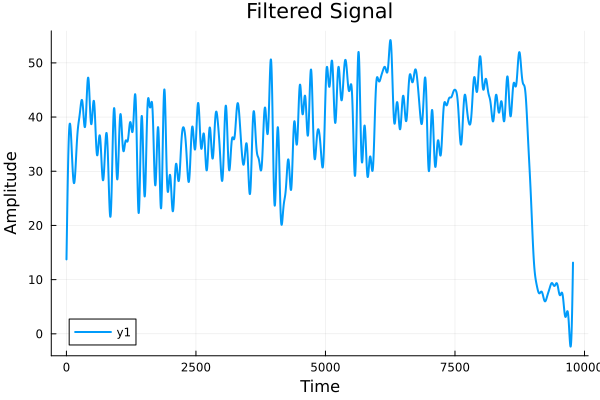

In [36]:
variant, (hist,mask)  = DataIO.load_cache("$(homedir())/.project_cache/$groupName/$w/HIV1_C_outmask.dat")

freq = rfftfreq(length(hist))

var_fft = rfft(hist)
# Generate frequency bins for real FFT
# For rfft, we only need frequencies up to Nyquist frequency
freq = rfftfreq(length(hist))
@inbounds for i in eachindex(freq)
    if freq[i] >= 0.01
        var_fft[i] = 0
    end
end
# Plot the filtered signal (inverse FFT back to time domain)
plot(irfft(var_fft, length(hist)),
     xlabel="Time",
     ylabel="Amplitude",
     title="Filtered Signal",
     linewidth=2)

In [22]:
open("regions_hbv.csv", "w") do io
        write(io, "virus,region_init,region_end\n")
        for (ri,re) in model.regions
            line = join([
                    escape_string(string(groupName)),
                    escape_string(string(ri)),
                    escape_string(string(re))
                ], ",")

            write(io, line * "\n")
        end
    end

In [6]:
total_length = 0
    for (i, e) in model.regions
        total_length += e - i
    end
total_length

58030

In [9]:
denv_pos = [(70, 78),
 (95, 436),
 (95, 394),
 (437, 934),
 (437, 709),
 (710, 934),
 (935, 2419),
 (2420, 3475),
 (3476, 4129),
 (4130, 4519),
 (4520, 6376),
 (6377, 6757),
 (6758, 6826),
 (6827, 7573),
 (7574, 10270),
 (132, 142),
 (10630, 10640)]

total = 0
for (reg_ini, reg_end) in model.regions

    for (denv_ini, denv_end) in denv_pos
        innner = intersecao_intervalos((reg_ini, reg_end),(denv_ini, denv_end))
        if (reg_ini>= denv_ini && reg_end <=denv_end)
            total+=1
            break
        end
    end
    
end
total

60

In [ ]:


pos = [2790,
3037,
5386,
5648,
8393,
10029,
12880,
13195,
14408,
15714,
17410,
23403,
23525,
24424,
24469,
25088,
26060,
26149,
28512]

found = map(havepos, pos)


19-element Vector{Tuple{Int64, Int64, Int64}}:
 (2790, 2602, 2835)
 (3037, 2885, 3550)
 (5386, 5086, 5494)
 (5648, 5500, 5736)
 (8393, 0, 0)
 (10029, 9711, 10411)
 (12880, 0, 0)
 (13195, 0, 0)
 (14408, 14242, 14505)
 (15714, 0, 0)
 (17410, 17386, 17615)
 (23403, 22403, 24009)
 (23525, 22403, 24009)
 (24424, 24053, 24594)
 (24469, 24053, 24594)
 (25088, 24766, 25167)
 (26060, 25992, 26526)
 (26149, 25992, 26526)
 (28512, 27495, 29061)

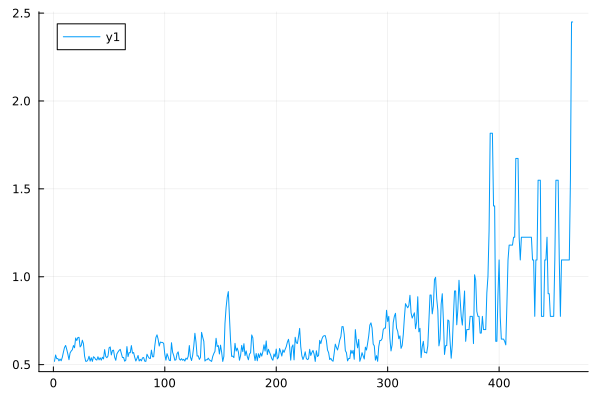

In [13]:
hist_collection::Vector{Vector{UInt64}} = []

for class  in  model.classes
    variant, (hist,mask) = DataIO.load_cache("$(homedir())/.project_cache/$groupName/$w/$(class)_outmask.dat")
    push!(hist_collection, hist)
end

min_size = minimum(length,hist_collection)


desvio = zeros(Float64,min_size)
medias = zeros(Float64,min_size)
coefs = zeros(Float64,min_size)

@inbounds for i in 1:min_size
    values_at_point_i = [s[i] for s in hist_collection]

    m = mean(values_at_point_i)
    s = std(values_at_point_i)

    medias[i] = m
    desvio[i] = s
    # Calcula o Coeficiente de Variação (CV)
    # Evita divisão por zero.
    coefs[i] = m != 0 ? s / m : 0.0
end

selec = [x for x in coefs if x >= (std(coefs)/mean(coefs))]

# @show length(selec), min_size
plot(selec)

In [20]:
plt = plot(title="K-mer presence - Regions Masks",
titlefont=10,
guidefontsize=8,
legend=:outertop, legendcolumns=5, dpi=300)

for class  in  model.classes
    variant, (hist,mask) = DataIO.load_cache("$(homedir())/.project_cache/$groupName/$w/$(class)_outmask.dat")
    plot!(plt,mask, label=class)
end
ylabel!("Position Mark (0-1)")
xlabel!("Positions")
yticks!([0,1])
# plot(plt)
savefig("sars_variant_mask.pdf")

"/home/salipe/Desktop/genomic-extractor/notebooks/sars_variant_mask.pdf"

In [18]:
plt = plot(title="K-mer presence - Windows Histogram",
titlefont=10,
guidefontsize=8,
legend=:outertop, 
legendcolumns=5, dpi=300)

for class  in  model.classes
    variant, (hist,mask) = DataIO.load_cache("$(homedir())/.project_cache/$groupName/$w/$(class)_outmask.dat")
    plot!(plt,hist, label=class)
end
ylabel!("Sequence presence amount")
xlabel!("Windows")
# plot(plt)
savefig("sars_variant_hist.pdf")

"/home/salipe/Desktop/genomic-extractor/notebooks/sars_variant_hist.pdf"

In [21]:
mask = zeros(model.regions[length(model.regions)][2])

for (i,e) in model.regions
    mask[i:e] = ones(e-i+1)
end
plot(mask,label="regions", title="Regions Extracted - Regions Masks Conjunction",
titlefont=10,
guidefontsize=8,
legend=:outertop, dpi=300)

ylabel!("Position Mark (0-1)")
xlabel!("Positions")
yticks!([0,1])

savefig("sars_conju_mask.pdf")

"/home/salipe/Desktop/genomic-extractor/notebooks/sars_conju_mask.pdf"

In [23]:

plt = plot(title="Variants Regions Behavior - $(length(model.regions)) windows",
titlefont=10,
guidefontsize=8,
legend=:outertop, legendcolumns=5, dpi=300)

for (class, distribution) in  model.class_string_probs
    plot!(plt,distribution, label=class)
end
ylabel!("Frequency (Fwr)")
xlabel!("Extracted Regions (Features)")
plot(plt)
savefig("sars_frequency_behaviour.pdf")


"/home/salipe/Desktop/genomic-extractor/notebooks/sars_frequency_behaviour.pdf"

In [14]:
function create_variants_region_grid(models; 
    titles=["Dengue", "Sars-CoV-2", "HBV", "HIV"],
    main_title="Viruses Regions Behavior Comparison",
    size=(1000, 800),
    dpi=300,
    legend_position=:outertop,
    legend_columns=4
)
    # Verify we have proper input
    num_models = length(models)
    if num_models == 0
        error("No models provided")
    elseif num_models > 4
        @warn "More than 4 models provided. Only the first 4 will be plotted."
        models = models[1:4]
        num_models = 4
    end
    
    # Ensure we have enough titles
    while length(titles) < num_models
        push!(titles, "Model $(length(titles) + 1)")
    end
    
    # Create the layout based on the number of models
    layout = if num_models == 1
        @layout [a]
    elseif num_models == 2
        @layout [a b]
    elseif num_models == 3
        @layout [a b; c _]
    else # num_models == 4
        @layout [a b; c d]
    end
    
    # Create the plot with subplots
    p = plot(layout=layout, size=size, dpi=dpi, plot_title=main_title, titlefont=10, guidefontsize=8)
    
    # Create each subplot
    for i in 1:num_models
        model = models[i]
        
        sp = p[i]
        
        # Set subplot title and attributes
        title!(sp, "$(titles[i]) - $(length(model.regions)) windows")
        plot!(sp, legend=legend_position, legendcolumns=legend_columns)
        
        # Add lines for each class directly to the subplot
        for (class, distribution) in model.class_string_probs
            plot!(sp, distribution, label=class)
        end
        
        # Add axis labels directly to the subplot
        ylabel!(sp, "Frequency (Fwr)")
        xlabel!(sp, "Extracted Regions (Features)")
    end
    
    plot(p)
    savefig("datasets_frequency_behaviour.pdf")
end


create_variants_region_grid (generic function with 1 method)

In [80]:
function create_variants_histogram_grid(
    models,
    variants::Array{Tuple{String, String}}; 
    titles=["Dengue", "Sars-CoV-2", "HBV", "HIV"],
    main_title="K-mers presence - Window histogram",
    size=(1000, 800),
    dpi=300,
    legend_position=:outertop,
    legend_columns=4
)
    # Verify we have proper input
    num_models = length(models)
    if num_models == 0
        error("No models provided")
    elseif num_models > 4
        @warn "More than 4 models provided. Only the first 4 will be plotted."
        models = models[1:4]
        num_models = 4
    end
    
    # Ensure we have enough titles
    while length(titles) < num_models
        push!(titles, "Model $(length(titles) + 1)")
    end
    
    # Create the layout based on the number of models
    layout = if num_models == 1
        @layout [a]
    elseif num_models == 2
        @layout [a b]
    elseif num_models == 3
        @layout [a b; c _]
    else # num_models == 4
        @layout [a b; c d]
    end
    
    # Create the plot with subplots
    p = plot(layout=layout, dpi=dpi, plot_title=main_title,plot_titlefont=10, titlefont=10,guidefontsize=8, margin=5mm)
    
    # Create each subplot
    for i in 1:num_models
        model = models[i]
        gp, window = variants[i]
        sp = p[i]

        title!(sp, "$(titles[i])")
        plot!(sp, legend=legend_position, size=size, legendcolumns=legend_columns,margin=1mm)

#         mask = zeros(model.regions[length(model.regions)][2])

# for (i,e) in model.regions
#     mask[i:e] = ones(e-i+1)
# end
# plot!(sp,mask, label="regions")
        
        for class  in  model.classes
            variant, (hist,mask) = DataIO.load_cache("$(homedir())/.project_cache/$gp/$window/$(class)_outmask.dat")
            plot!(sp,hist, label=class)
        end
        ylabel!(sp,"K-mers appearences")
        xlabel!(sp,"Windows")
        # yticks!([0,1])
        # ylabel!("Position Mark (0-1)")
        # xlabel!("Positions")
    end
    
    plot(p)
    savefig("datasets_hist.pdf")
end


create_variants_histogram_grid (generic function with 1 method)

In [81]:
models = []
variants::Array{Tuple{String, String}} = [
    ("denv", "0.002"),
    ("sars", "0.0035"),
    ("hbv", "0.0025"),
    ("hiv", "0.003"),
]

for (var, win) in variants
    model = DataIO.load_cache("$(homedir())/.project_cache/$var/$win/kmers_distribution.dat")
    push!(models, model)
end

# create_variants_region_grid(models;
# titles=["Dengue - 0.2%", "Sars-CoV-2 - 0.35%", "HBV - 0.25%", "HIV - 0.3%"],
# size=(950, 900))

create_variants_histogram_grid(models, variants;
titles=["Dengue - 0.2%", "Sars-CoV-2 - 0.35%", "HBV - 0.25%", "HIV - 0.3%"],
main_title="K-mer presence -  Windows Histogram",
size=(850, 750))


"/home/salipe/Desktop/genomic-extractor/notebooks/datasets_hist.pdf"